## 00_Start_EDA
### EDA 시작하기

>### 01. 라이브러리 가져오기 Import Libraries
>### 02. 데이터 불러오기 Load Data
>### 03. 데이터 탐색하기 Explore Data
>### 04. 기술통계량 계산하기 Descriptive Statistics
>### 05. 단변량 분석 Univariate Analysis
>### 06. 이변량 분석 Bivariate Analysis
>### 07. 다변량 분석 Multivariate Analysis
>### 08. 이상치 탐지 Outlier Detection
>### 09. 데이터 변환 Data Transformation
>### 10. 결론 Conclusion

---

목적
* 음주는 비만 동반 질병 위험도에 영향을 줄까? (음주 관련 컬럼:DRK_YN,SGOT_AST,SGPT_ALT,GAMMA_GTP), RISK(비만 동반 질병 위험도)

### 01. 라이브러리 가져오기 및 기타 설정 Import Libraries and other configurations
- pandas, numpy, matplotlib, seaborn 등 필요한 라이브러리를 가져오고 다양한 설정을 합니다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 변경될 사항 등을 알려주는 경고 메시지 무시하고 숨김
import warnings
warnings.filterwarnings('ignore')

### 02. 데이터 불러오기 Load Data
- csv / excel / DB / json / html / package data 데이터 타입에 맞는 방법으로 데이터셋을 불러옵니다. 
- 기본적으로 pandas의 DataFrame 형태의 데이터셋으로 분석을 진행합니다.

In [3]:
# 인코딩 에러(한글이 들어간 파일의 인코딩 에러 해결)
df=pd.read_csv('/Users/supersong/Documents/python/data/nhis_nhcp_info_20211229.csv',encoding='cp949')

### 03. 데이터 탐색하기 Explore Data
- 데이터셋의 형태, 열, 데이터 타입, 결측치 등을 살펴봄으로써 데이터에 대한 개요를 파악합니다.

In [3]:
# 데이터 모양 확인
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [4]:
# 데이터 모양 확인
df.shape

(1000000, 31)

* 100만개의 행과 31개의 열로 이루어져있음.

In [5]:
# 컬럼명이 한글(한글이 깨질 수도 있기 때문에 컬럼명을 영어로 변경)
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [6]:
# 컬럼명을 영어로 변경
df.columns=['HCHK_YEAR','IDV_ID','SIDO','SEX','AGE_GROUP','HEIGHT',
           'WEIGHT','WAIST','SIGHT_LEFT','SIGHT_RIGHT','HEAR_LEFT',
           'HEAR_RIGHT','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE','TRIGLYCERIDE',
           'HDL_CHOLE','LDL_CHOLE','HMG','OLIG_PROTE_CD','CREATININE',
           'SGOT_AST','SGPT_ALT','GAMMA_GTP','SMK_STAT_TYPE_CD','DRK_YN',
           'HCHK_OE_INSPEC_YN','CRS_YN','TTR_YN','DATA_STD_DT']

In [7]:
# 컬럼명 변경됨 확인
df.head()

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD_DT
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [8]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   HCHK_YEAR          1000000 non-null  int64  
 1   IDV_ID             1000000 non-null  int64  
 2   SIDO               1000000 non-null  int64  
 3   SEX                1000000 non-null  int64  
 4   AGE_GROUP          1000000 non-null  int64  
 5   HEIGHT             1000000 non-null  int64  
 6   WEIGHT             1000000 non-null  int64  
 7   WAIST              999892 non-null   float64
 8   SIGHT_LEFT         999743 non-null   float64
 9   SIGHT_RIGHT        999748 non-null   float64
 10  HEAR_LEFT          999778 non-null   float64
 11  HEAR_RIGHT         999770 non-null   float64
 12  BP_HIGH            992468 non-null   float64
 13  BP_LWST            992466 non-null   float64
 14  BLDS               992398 non-null   float64
 15  TOT_CHOLE          402306 non-nul

* 9개의 컬럼 제외한 모든 컬럼에 결측치가 존재하고 결측치가 많은 컬럼은 반 이상이 결측치임을 확인.

In [9]:
# 컬럼별로 결측치의 개수(count)와 비율(percent) 확인
missing_df=df.isnull().sum().reset_index()
missing_df.columns=['column','count']
missing_df['percent']=round((missing_df['count']/df.shape[0])*100,2)
missing_df.loc[missing_df['percent']!=0].sort_values('count',ascending=False)

,column,count,percent
29,TTR_YN,668618,66.86
28,CRS_YN,668617,66.86
18,LDL_CHOLE,605529,60.55
15,TOT_CHOLE,597694,59.77
17,HDL_CHOLE,597685,59.77
16,TRIGLYCERIDE,597678,59.77
20,OLIG_PROTE_CD,12141,1.21
19,HMG,7611,0.76
24,GAMMA_GTP,7603,0.76
14,BLDS,7602,0.76


In [10]:
# percent가 50이상인 컬럼 삭제
df.drop(['TTR_YN', 'CRS_YN', 'LDL_CHOLE', 'TOT_CHOLE', 'HDL_CHOLE', 'TRIGLYCERIDE'], axis=1, inplace=True)

# 불필요한 컬럼 삭제(유니크값이 하나)
df.drop(['DATA_STD_DT','HCHK_YEAR'], axis=1, inplace=True)

* 6개의 컬럼이 전체 데이터의 50프로 이상이 결측치이고 나머지는 1프로 미만이 대부분임.
* 결측치가 50프로 이상인 컬럼(TTR_YN, CRS_YN, LDL_CHOLE, TOT_CHOLE, HDL_CHOLE, TRIGLYCERIDE) 삭제
* 불필요한 컬럼(DATA_STD_DT,HCHK_YEAR) 삭제

### 04. 기술통계량 계산하기 Descriptive Statistics
- 데이터셋을 요약하기 위해 일부 기술통계량을 계산합니다.

In [11]:
print(df.describe())

               IDV_ID            SIDO             SEX       AGE_GROUP  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean    500000.500000       34.047725        1.489311       11.917757   
std     288675.278933       12.443883        0.499886        2.171036   
min          1.000000       11.000000        1.000000        9.000000   
25%     250000.750000       27.000000        1.000000       10.000000   
50%     500000.500000       41.000000        1.000000       12.000000   
75%     750000.250000       44.000000        2.000000       13.000000   
max    1000000.000000       49.000000        2.000000       18.000000   

               HEIGHT          WEIGHT          WAIST     SIGHT_LEFT  \
count  1000000.000000  1000000.000000  999892.000000  999743.000000   
mean       160.964085       63.060790      82.357094       0.933045   
std          9.197899       12.269907       9.622632       0.637453   
min        130.000000       30.000000       5.800000      

* SEX(성별): 남성과 여성의 비율이 비슷하지만 남성이 더 많음.
* AGE_GROUP(연령대코드(5세단위)): 수진자의 연령이 40에서 85세 이상이며 50에서 59세가 주를 이룰 것으로 예상.
* WAIST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,GAMMA_GTP,SGPT_ALT,SGOT_AST,CREATININE 컬럼은 이상치 의심해야함.

In [12]:
# 데이터 타입별 유니크한 value값(샘플) 및 개수 확인
for col in df.select_dtypes('int64').columns.tolist():
    print(df[col].name)
    print('유니크값 개수 :' ,df[col].nunique())
    print('유니크값 샘플 :', df[col].unique()[0:3])    
    print('------------------------------')

IDV_ID
유니크값 개수 : 1000000
유니크값 샘플 : [1 2 3]
------------------------------
SIDO
유니크값 개수 : 17
유니크값 샘플 : [36 27 11]
------------------------------
SEX
유니크값 개수 : 2
유니크값 샘플 : [1 2]
------------------------------
AGE_GROUP
유니크값 개수 : 10
유니크값 샘플 : [ 9 13 12]
------------------------------
HEIGHT
유니크값 개수 : 14
유니크값 샘플 : [165 150 155]
------------------------------
WEIGHT
유니크값 개수 : 22
유니크값 샘플 : [60 65 55]
------------------------------
HCHK_OE_INSPEC_YN
유니크값 개수 : 2
유니크값 샘플 : [0 1]
------------------------------


In [13]:
for col in df.select_dtypes('float64').columns.tolist():
    print(df[col].name)
    print('유니크값 개수 :', df[col].nunique())
    print('유니크값 샘플 :', df[col].unique()[0:3])
    print('------------------------------')

WAIST
유니크값 개수 : 777
유니크값 샘플 : [72.1 81.  70. ]
------------------------------
SIGHT_LEFT
유니크값 개수 : 24
유니크값 샘플 : [1.2 0.8 0.6]
------------------------------
SIGHT_RIGHT
유니크값 개수 : 24
유니크값 샘플 : [1.5 0.8 0.7]
------------------------------
HEAR_LEFT
유니크값 개수 : 3
유니크값 샘플 : [1. 2. 3.]
------------------------------
HEAR_RIGHT
유니크값 개수 : 3
유니크값 샘플 : [1. 2. 3.]
------------------------------
BP_HIGH
유니크값 개수 : 174
유니크값 샘플 : [127. 110. 123.]
------------------------------
BP_LWST
유니크값 개수 : 126
유니크값 샘플 : [79. 73. 80.]
------------------------------
BLDS
유니크값 개수 : 491
유니크값 샘플 : [ 90.  87. 102.]
------------------------------
HMG
유니크값 개수 : 196
유니크값 샘플 : [15.  12.7 12.8]
------------------------------
OLIG_PROTE_CD
유니크값 개수 : 6
유니크값 샘플 : [ 1. nan  3.]
------------------------------
CREATININE
유니크값 개수 : 188
유니크값 샘플 : [1.1 0.5 0.7]
------------------------------
SGOT_AST
유니크값 개수 : 580
유니크값 샘플 : [21. 18. 27.]
------------------------------
SGPT_ALT
유니크값 개수 : 637
유니크값 샘플 : [27. 15. 25.]
------------------

### 파생변수(BMI,FATNESS,OBESITY,RISK) 생성

In [14]:
# 'BMI(체질량지수)'컬럼 생성(WEIGHT,HEIGHT컬럼 활용)
df['BMI']=round(df['WEIGHT']/(df['HEIGHT']*df['HEIGHT'])*10000,2)

# 'FATNESS(비만도)'컬럼 생성(BMI컬럼 활용/대한비만학회 비만 진료지침 2022기준/남녀공통)
df['FATNESS']=np.nan

df['FATNESS'].loc[df['BMI']<18.5]='저체중' 
df['FATNESS'].loc[(df['BMI']>=18.5) & (df['BMI']<23.0)]='정상체중'
df['FATNESS'].loc[(df['BMI']>=23.0) & (df['BMI']<25.0)]='과체중'
df['FATNESS'].loc[(df['BMI']>=25.0) & (df['BMI']<30.0)]='경도비만'
df['FATNESS'].loc[(df['BMI']>=30.0) & (df['BMI']<35.0)]='중등도비만'
df['FATNESS'].loc[df['BMI']>=35.0]='고도비만'

# 'OBESITY(복부비만)'컬럼 생성(WAIST,SEX컬럼 활용/대한비만학회 비만 진료지침 2022기준/남녀분리(남:1/여:2))
df['OBESITY']=np.nan

df['OBESITY'].loc[(df['WAIST']<90)&(df['SEX']==1)]='정상'
df['OBESITY'].loc[(df['WAIST']>=90)&(df['SEX']==1)]='복부비만'
df['OBESITY'].loc[(df['WAIST']<85)&(df['SEX']==2)]='정상'
df['OBESITY'].loc[(df['WAIST']>=85)&(df['SEX']==2)]='복부비만'

# FATNESS와 OBESITY에 따른 RISK(비만 동반 질환 위험도)컬럼 생성(대한비만학회 비만 진료지침 2022기준/남녀공통)
# 위험도 점수(낮음:1, 보통:2, 약간 높음:3, 높음:4, 매우 높음:5, 가장 높음:6)
df['RISK']=np.nan

df['RISK'].loc[(df['FATNESS']=='저체중')&(df['OBESITY']=='정상')]=1
df['RISK'].loc[(df['FATNESS']=='정상체중')&(df['OBESITY']=='정상')]=2
df['RISK'].loc[(df['FATNESS']=='과체중')&(df['OBESITY']=='정상')]=3
df['RISK'].loc[(df['FATNESS']=='경도비만')&(df['OBESITY']=='정상')]=4
df['RISK'].loc[(df['FATNESS']=='중등도비만')&(df['OBESITY']=='정상')]=5
df['RISK'].loc[(df['FATNESS']=='고도비만')&(df['OBESITY']=='정상')]=6

df['RISK'].loc[(df['FATNESS']=='저체중')&(df['OBESITY']=='복부비만')]=2
df['RISK'].loc[(df['FATNESS']=='정상체중')&(df['OBESITY']=='복부비만')]=3
df['RISK'].loc[(df['FATNESS']=='과체중')&(df['OBESITY']=='복부비만')]=4
df['RISK'].loc[(df['FATNESS']=='경도비만')&(df['OBESITY']=='복부비만')]=5
df['RISK'].loc[(df['FATNESS']=='중등도비만')&(df['OBESITY']=='복부비만')]=6
df['RISK'].loc[(df['FATNESS']=='고도비만')&(df['OBESITY']=='복부비만')]=6

In [15]:
# RISK의 value에 따른 개수
df['RISK'].value_counts().sort_index(ascending=True)

1.0     35051
2.0    357425
3.0    200406
4.0    180231
5.0    175902
6.0     50877
Name: RISK, dtype: int64

### 05. 단변량 분석 Univariate Analysis
- 히스토그램, 박스플롯 등을 그려 각 변수를 개별적으로 분석합니다.
- 각 변수의 특성과 분포들을 파악할 수 있습니다.(변수에 따라 통계적 유의성 검정도 진행할 수 있음)

<AxesSubplot:xlabel='SEX', ylabel='count'>

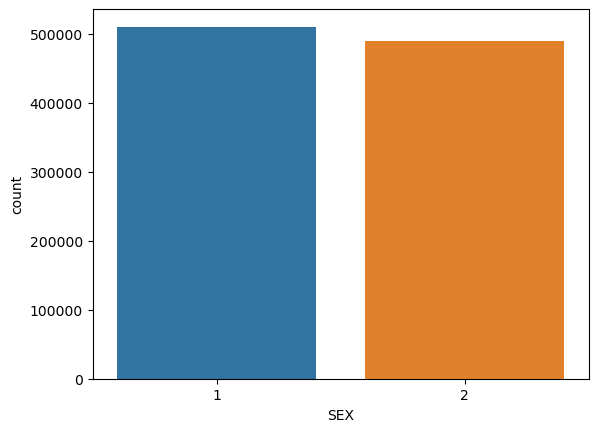

In [16]:
sns.countplot(df['SEX'])

* SEX(성별): 남성과 여성의 비율이 비슷하지만 남성이 조금 더 많음.

<AxesSubplot:xlabel='AGE_GROUP', ylabel='Count'>

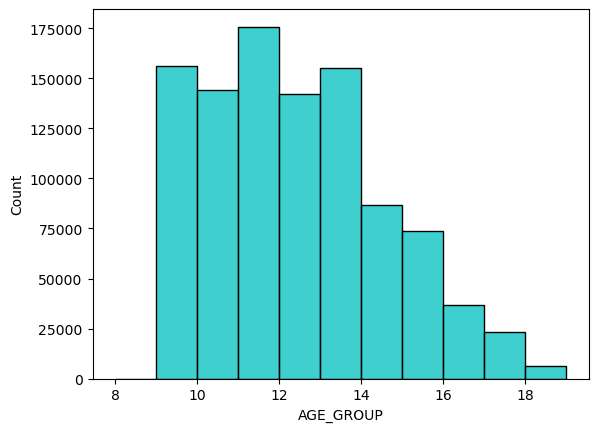

In [17]:
sns.histplot(df['AGE_GROUP'],bins=range(8,20,1),color='c', edgecolor='k')

* AGE_GROUP(연령대코드(5세단위)): 40에서 69세가 주를 이루며 50에서 54세 그룹이 가장 많음.(40세 미만은 대상이 아님.)

<AxesSubplot:xlabel='SIDO', ylabel='count'>

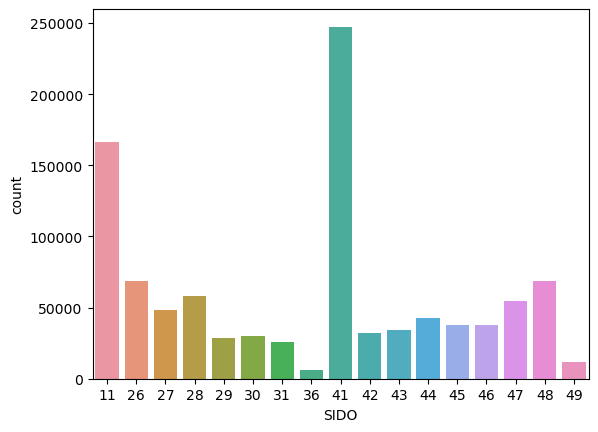

In [18]:
sns.countplot(df['SIDO'])

* 수도권에 거주하는 검진자의 수가 전체의 40프로 이상임. [수도권 : 경기도(41), 서울특별시(11), 인천광역시(28)/지방권 : 나머지]

<AxesSubplot:xlabel='OLIG_PROTE_CD', ylabel='count'>

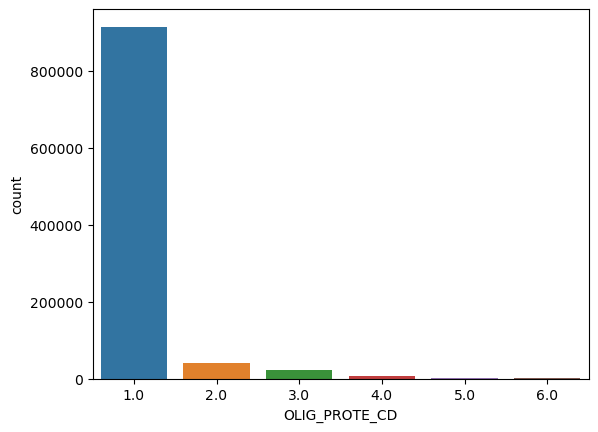

In [19]:
sns.countplot(df['OLIG_PROTE_CD'])

* 요단백의 수치는 음성과 양성으로 나뉘고 음성(-)이 체크되어 존재하지 않아야 함. (이상시 +1, +2, +3, +4 이런식으로 체크됨)
* 1(-/음성), 2(+-/약양성), 3(+1/양성), 4(+2/양성), 5(+3/양성), 6(+4/양성)

<AxesSubplot:xlabel='WAIST'>

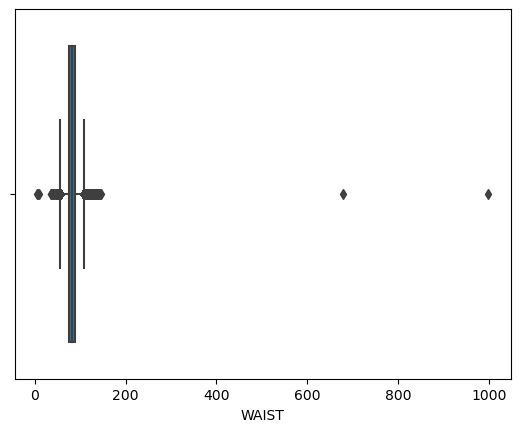

In [20]:
sns.boxplot(df['WAIST'])

* WAIST(허리둘레): 146까지는 존재할 수도 있겠지만 680, 999와 같은 수치는 이상치임.

<AxesSubplot:xlabel='SIGHT_RIGHT'>

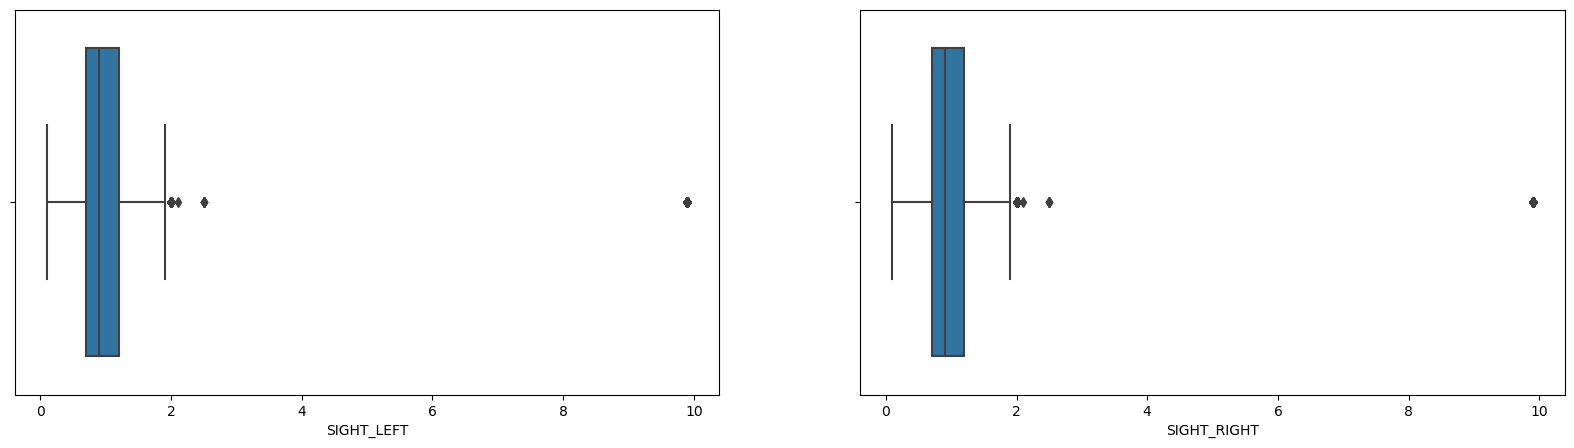

In [21]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df['SIGHT_LEFT'])
plt.subplot(1,2,2)
sns.boxplot(df['SIGHT_RIGHT'])

* SIGHT_LEFT(시력(좌)): 시력 범위가 0.1~2.5인데 9.9인 데이터(실명)를 어떻게 처리할지 생각.(3700개 정도 있음)

* SIGHT_RIGHT(시력(우)): 시력 범위가 0.1~2.5인데 9.9인 데이터(실명)를 어떻게 처리할지 생각.(3800개 정도 있음) 

* 9.9이면 시력이 좋은 것으로 설명이 될거같아서 실명인 데이터를 0.0으로 대체하는것이 좋아보임.

<AxesSubplot:xlabel='HEAR_RIGHT', ylabel='count'>

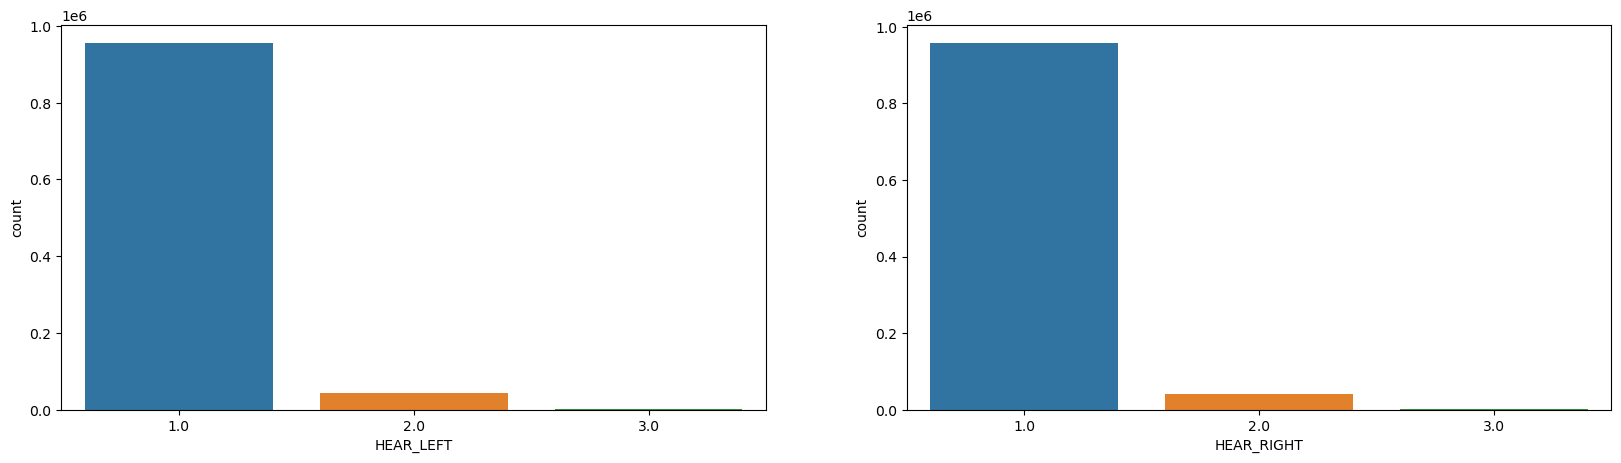

In [22]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df['HEAR_LEFT'])
plt.subplot(1,2,2)
sns.countplot(df['HEAR_RIGHT'])

* HEAR_LEFT(청력(좌)): (정상:1,비정상:0)인데 3인 데이터는 무엇을 의미하는지, 어떻게 처리할지 생각.(1700건 정도 있음)
* HEAR_RIGHT(청력(우)): (정상:1,비정상:0)인데 3인 데이터는 무엇을 의미하는지, 어떻게 처리할지 생각.(1500건 정도 있음)

<AxesSubplot:xlabel='CREATININE'>

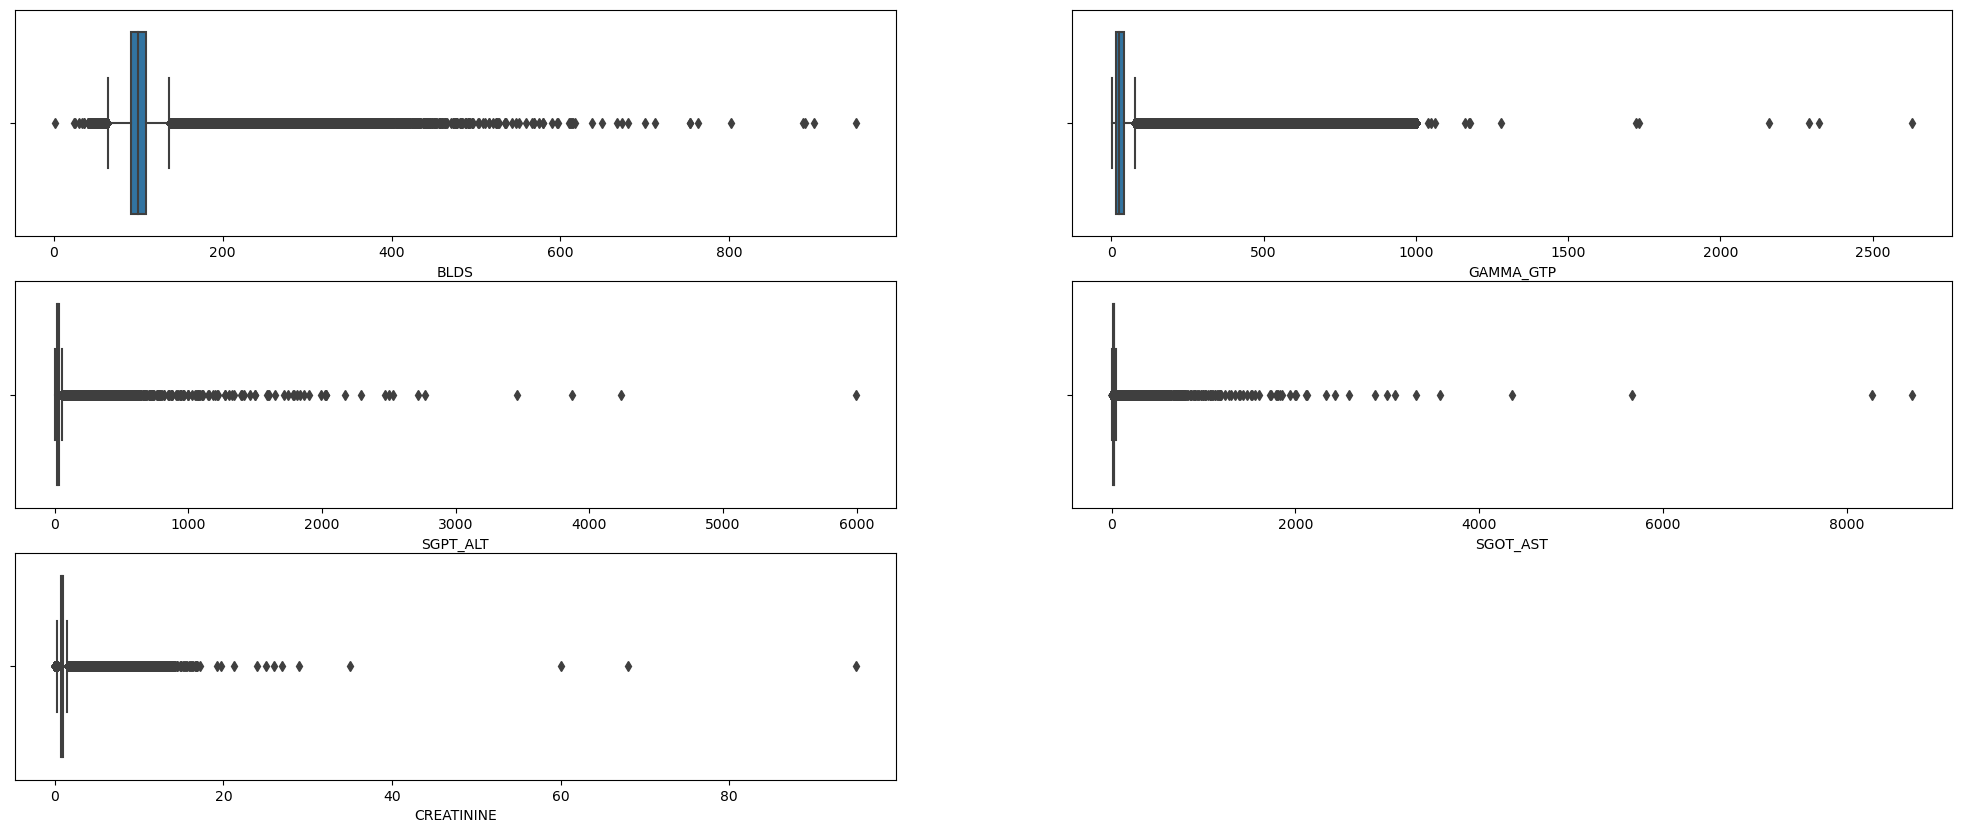

In [23]:
plt.figure(figsize=(25,10))

plt.subplot(3,2,1)
sns.boxplot(df['BLDS'])
plt.subplot(3,2,2)
sns.boxplot(df['GAMMA_GTP'])
plt.subplot(3,2,3)
sns.boxplot(df['SGPT_ALT'])
plt.subplot(3,2,4)
sns.boxplot(df['SGOT_AST'])
plt.subplot(3,2,5)
sns.boxplot(df['CREATININE'])

* GAMMA_GTP의 정상치 : 남성 11-63/여성 8-35
* SGPT_ALT의 정상치 : 0~40
* SGOT_AST의 정상치 : 0~40
* CREATININE의 정상치 : 0.8~1.7


* BLDS, GAMMA_GTP, SGPT_ALT, SGOT_AST, CREATININE 컬럼은 이상치 의심. -> 각 데이터의 특성을 파악하여 이상치의 범위를 어떻게 잡아야할지 생각. 

<AxesSubplot:xlabel='HCHK_OE_INSPEC_YN', ylabel='count'>

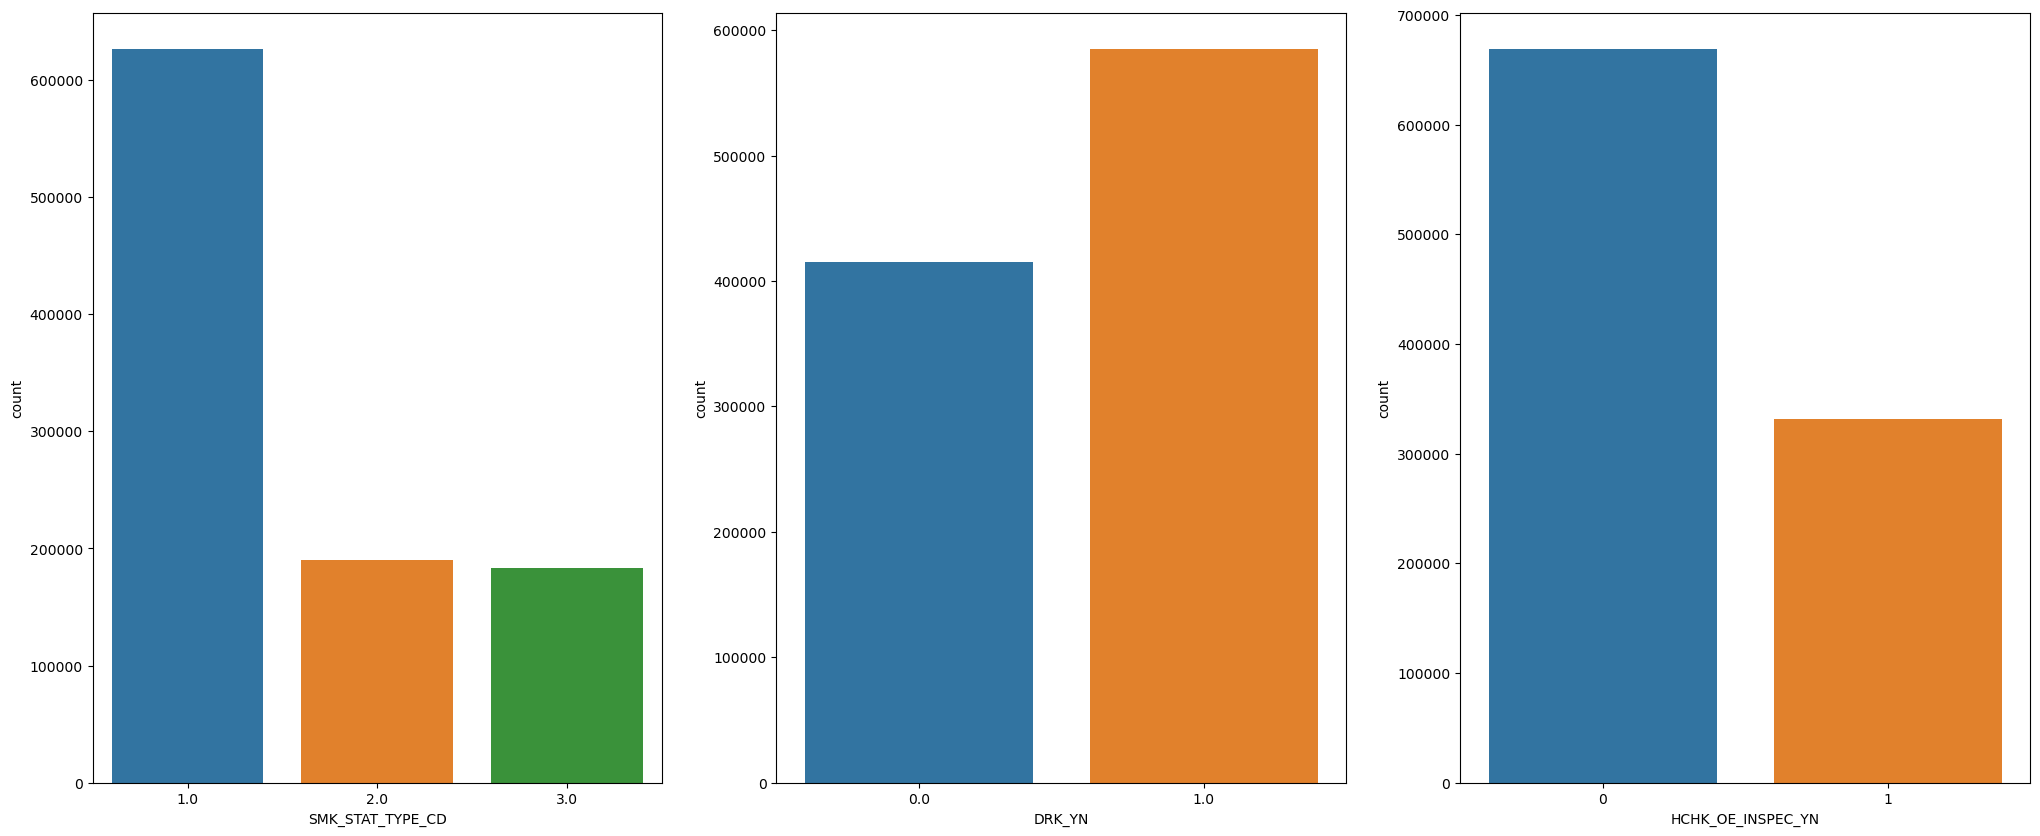

In [24]:
plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
sns.countplot(df['SMK_STAT_TYPE_CD'])
plt.subplot(1,3,2)
sns.countplot(df['DRK_YN'])
plt.subplot(1,3,3)
sns.countplot(df['HCHK_OE_INSPEC_YN'])

* 흡연상태 (1:피우지않는다/2:이전에 피웠으나 끊었다/3:현재도 피우고 있다) -> 현재 비흡연 상태(1&2)인 검진자의 수가 전체의 80프로 이상이다.
* 0(마시지 않는다), 1(마신다) -> 술을 마시는 사람의 수가 더 많은 것을 확인.
* 구강검진을 선택하여 검진하였는지 여부 : 0(미수검)/1(수검) -> 구강검진 미수검자가 수검자의 2배 정도임을 확인

<AxesSubplot:xlabel='RISK', ylabel='count'>

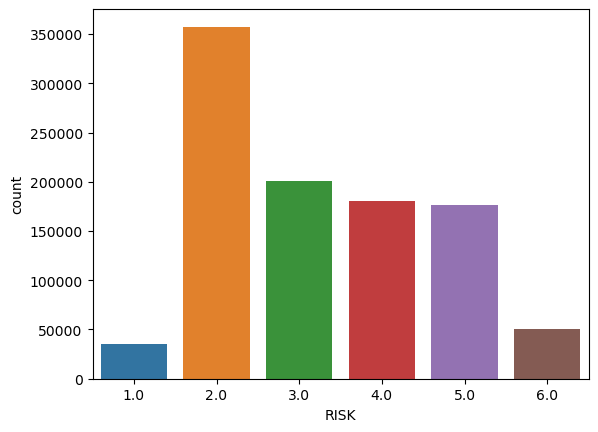

In [25]:
sns.countplot(df['RISK'])

* 파생변수 RISK(비만 동반 질환 위험도): 위험도가 2~5에 주로 분포하고 2가 가장 많음.
* 위험도 점수(낮음:1, 보통:2, 약간 높음:3, 높음:4, 매우 높음:5, 가장 높음:6)

### 06. 이변량 분석 Bivariate Analysis
- 산점도, 히트맵 등을 그려 두 변수 간의 관계를 분석합니다.
- 상관분석 / 회귀분석 등 또한 진행할 수 있습니다.
- 독립변수(x)와 종속변수(y)의 관계 혹은 독립변수(x1)와 독립변수(x2) 등 다양한 관계를 볼 수 있습니다.

<AxesSubplot:xlabel='WEIGHT', ylabel='Count'>

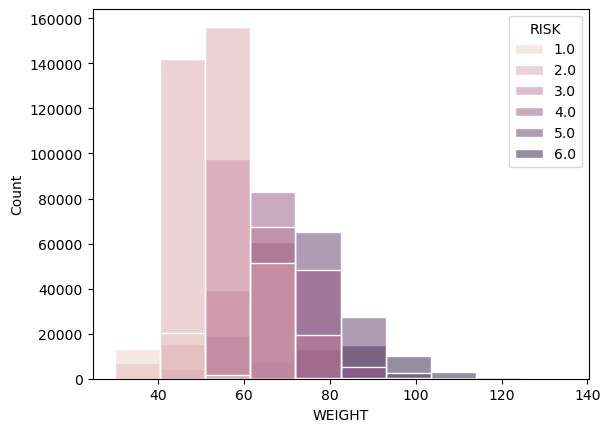

In [26]:
# X(수치형)-Y(범주형)
sns.histplot(x='WEIGHT', data=df, hue='RISK', bins=10, edgecolor='WHITE')

* RISK 변수가 비만 동반 질환 위험도이기 때문에 몸무게가 많이 나갈수록 높은 점수의 비율이 증가하는 것을 볼수있다.

<AxesSubplot:xlabel='WAIST', ylabel='Count'>

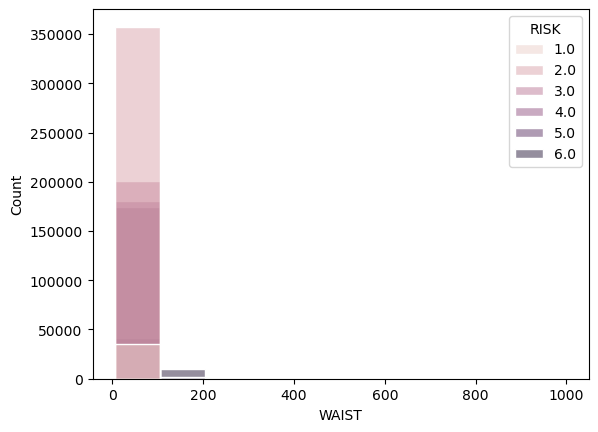

In [27]:
# X(수치형)-Y(범주형)
sns.histplot(x='WAIST', data=df, hue='RISK', bins=10, edgecolor='WHITE')

* RISK 변수가 비만 동반 질환 위험도이기 때문에 허리둘레의 수치가 클수록 높은 점수의 비율이 증가하는 것을 볼수있다.

RISK   1.0    2.0    3.0    4.0    5.0   6.0
SEX                                         
1     2.24  27.45  21.36  21.74  21.93  5.28
2     4.83  44.40  18.66  14.15  13.07  4.89


<AxesSubplot:xlabel='SEX'>

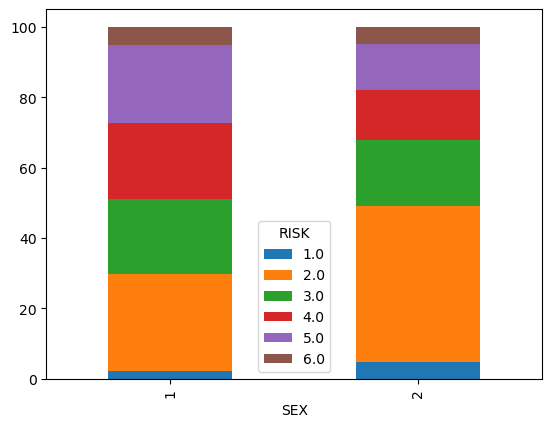

In [28]:
temp = round(pd.crosstab(df['SEX'], df['RISK'], normalize='index')*100,2)
print(temp)
temp.plot.bar(stacked=True)

* 남성이 여성보다 높은 RISK점수(3~6)의 비율이 더 많음을 확인할 수 있다.

RISK     1.0    2.0    3.0    4.0    5.0   6.0
DRK_YN                                        
0.0     4.27  38.10  19.48  16.63  16.54  4.97
1.0     2.96  34.07  20.44  19.02  18.34  5.17


<AxesSubplot:xlabel='DRK_YN'>

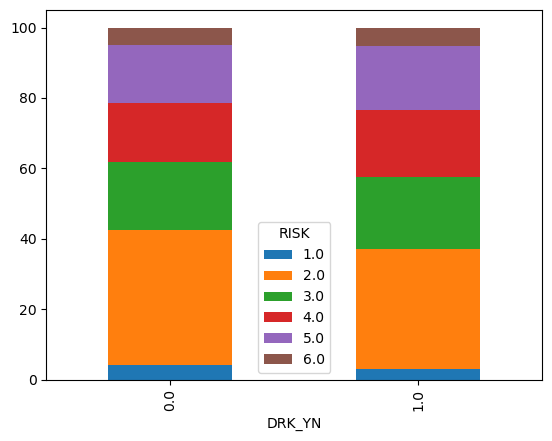

In [29]:
# X(범주형)-Y(범주형)
# 위험도 점수(낮음:1, 보통:2, 약간 높음:3, 높음:4, 매우 높음:5, 가장 높음:6)
temp2 = round(pd.crosstab(df['DRK_YN'], df['RISK'], normalize='index')*100,2)
print(temp2)
temp2.plot.bar(stacked=True)

* 술 안마시는 집단(0)보다 마시는 집단(1)의 높은 RISK점수(3~6)의 비율이 더 많음을 확인할 수 있다.

### 07. 다변량 분석 Multivariate Analysis
- pairplot, 히트맵 등을 그려 두 변수 이상 간의 관계를 분석합니다.
- 회귀분석, 군집분석, 분산분석, 구조방정식 모델링 등 분석방법을 적용할 수 있습니다. 
- 상관계수 0.7기준으로 다중공선성을 확인하여 주성분분석(PCA) 등 적합한 방법을 통해 변수를 선택합니다.

히트맵(두 변수 이상 간의 관계 확인)

<AxesSubplot:>

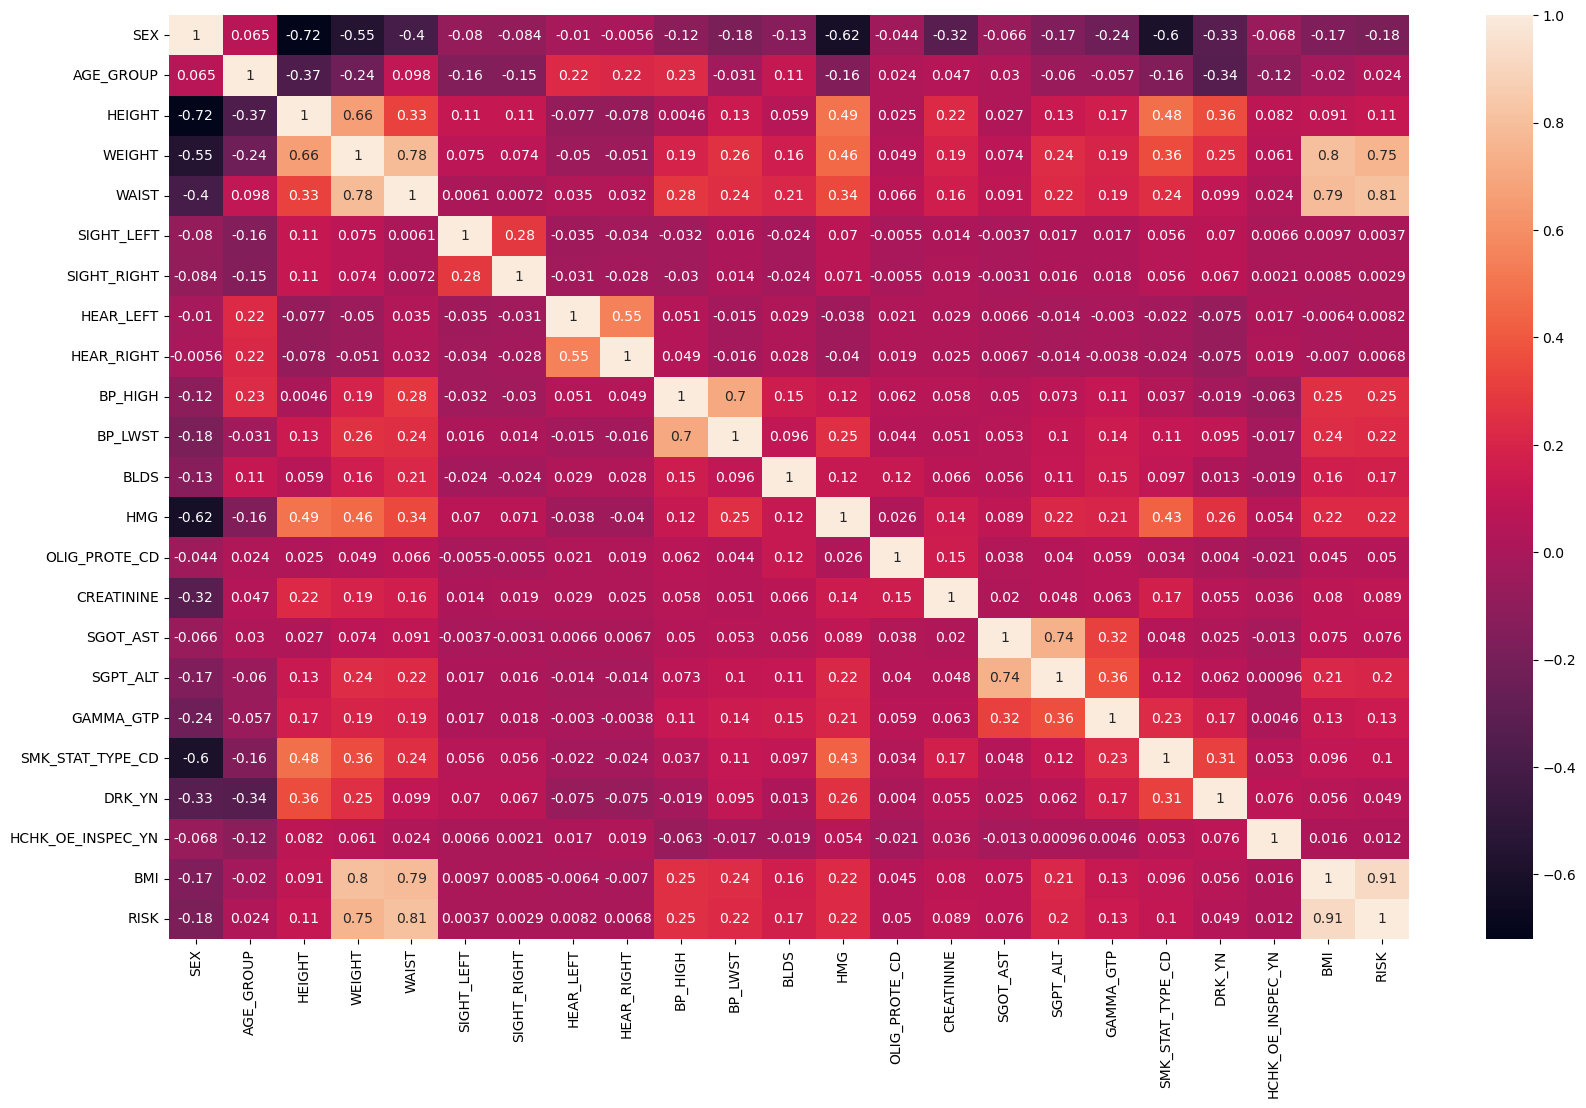

In [30]:
df_corr=df.iloc[:,2:]
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_corr.corr(), annot=True)

독립변수들과 RISK의 상관관계 비교

In [31]:
corr = df_corr.corr(method='pearson')
correlation=corr.unstack()
RISK_corr=pd.DataFrame(abs(round(correlation['RISK'],4)).sort_values(ascending=False),columns=['RISK'])
RISK_corr.head(15)

,RISK
RISK,1.0000
BMI,0.9144
WAIST,0.8081
WEIGHT,0.7536
BP_HIGH,0.2499
BP_LWST,0.2245
HMG,0.2225
SGPT_ALT,0.2029
SEX,0.1825
BLDS,0.1690


* RISK는 BMI,WAIST,WEIGHT,BP_HIGH,BP_LWST,HMG,SGPT_ALT 순으로 상관관계가 높다.

### 08. 이상치 탐지 Outlier Detection
- 데이터셋에서 이상치를 탐지하고 적절히 처리합니다.

In [32]:
# 시력(좌/우)
df['SIGHT_LEFT'].loc[df['SIGHT_LEFT']>2.5]=0
df['SIGHT_RIGHT'].loc[df['SIGHT_RIGHT']>2.5]=0

* 시력(좌/우)는 0.1~2.5 사이의 값으로 표기하며 실명은 9.9로 표기하였는데, 9.9이면 시력이 좋은 것으로 설명이 될거같아서 실명인 데이터를 0.0으로 대체함.

In [33]:
# 청력(좌/우)
df['HEAR_LEFT'].loc[df['HEAR_LEFT']==3]=1
df['HEAR_RIGHT'].loc[df['HEAR_RIGHT']==3]=1

* 청력(좌/우)는 1(정상), 2(비정상)으로 표기되는데 3이라는 이상치가 많지 않게 존재하여 최빈값(정상)으로 대체

BLDS,GAMMA_GTP,SGPT_ALT,SGOT_AST,CREATININE 컬럼의 이상치 처리하기

In [34]:
df1=df[['BLDS','GAMMA_GTP','SGPT_ALT','SGOT_AST','CREATININE','WAIST']]

# df1 컬럼별 IQR, 상한값, 하한값 설정
df1_Q1=df1.quantile(0.25)
df1_Q3=df1.quantile(0.75)

df1_IQR=df1_Q3-df1_Q1 # IQR

df1_lower=df1_Q1-(1.5*df1_IQR) # 상한값
df1_upper=df1_Q3+(1.5*df1_IQR) # 하한값

In [35]:
# df1 컬럼 이상치 처리
df['BLDS'].loc[df['BLDS']>=df1_upper[0]]=df1_upper[0]
df['BLDS'].loc[df['BLDS']<=df1_lower[0]]=df1_lower[0]

df['GAMMA_GTP'].loc[df['GAMMA_GTP']>=df1_upper[1]]=df1_upper[1]
df['GAMMA_GTP'].loc[df['GAMMA_GTP']<=df1_lower[1]]=df1_lower[1]

df['SGPT_ALT'].loc[df['SGPT_ALT']>=df1_upper[2]]=df1_upper[2]
df['SGPT_ALT'].loc[df['SGPT_ALT']<=df1_lower[2]]=df1_lower[2]

df['SGOT_AST'].loc[df['SGOT_AST']>=df1_upper[3]]=df1_upper[3]
df['SGOT_AST'].loc[df['SGOT_AST']<=df1_lower[3]]=df1_lower[3]

df['CREATININE'].loc[df['CREATININE']>=df1_upper[4]]=df1_upper[4]
df['CREATININE'].loc[df['CREATININE']<=df1_lower[4]]=df1_lower[4]

df['WAIST'].loc[df['WAIST']>=df1_upper[5]]=df1_upper[5]
df['WAIST'].loc[df['WAIST']<=df1_lower[5]]=df1_lower[5]

* df1 : 상한값 이상인 데이터는 상한값으로, 하한값 이하인 데이터는 하한값으로 이상치 처리할 컬럼
* 하한값과 상한값을 결정한 후 하한값보다 적으면 하한값으로 대체, 상한값보다 크면 상한값으로 대체함
* 각각의 이상치들의 최소/최대가 0~88946개임.

### 09. 데이터 변환 Data Transformation
- 스케일링, 인코딩, 결측치 처리 등을 적용하여 데이터를 변환합니다.
- 각 데이터의 특성에 따라 처리방법에 대하여 적합한 방법을 선택합니다.
- 스케일링 방법 
>- Min-Max Scaling : 데이터를 최소값과 최대값을 이용하여 0과 1 사이의 범위로 조정하는 방법입니다.
>- Standard Scaling : 데이터의 평균값과 표준편차를 이용하여 표준정규분포 형태로 조정하는 방법입니다.
>- MaxAbs Scaling : 데이터의 최대절대값을 이용하여 -1과 1 사이의 범위로 조정하는 방법입니다.
>- Robust Scaling : Median과 Interquartile range(IQR)를 이용하여 이상치(outlier)에 영향을 받지 않고 Scaling하는 방법입니다.
>- Power Transform : 데이터의 분포가 비대칭(skewed)한 경우, 분포를 정규분포와 같은 형태로 조정하는 방법입니다.
- 인코딩 방법(범주형 변수)
>- One-hot Encoding : 범주형 변수를 이진형 변수로 변환하는 방법입니다. 2개 이상인 경우에는 사용하는 것이 좋습니다.
>- Label Encoding : 범주형 변수의 각 값에 고유한 정수를 부여하는 방법입니다. 정수값이 모델에 영향을 미칠 수 있지만 변수의 값이 매우 많은 경우에는 고려해볼 수도 있습니다.
- 결측치 처리 방법
>- 결측치가 있는 데이터 행 삭제 : 결측치가 있는 데이터 행을 삭제하는 방법입니다. 하지만 이 경우 데이터의 양이 많지 않을 때는 유용할 수 있지만, 결측치가 많은 경우 데이터의 손실이 크게 일어날 수 있습니다.
>- 평균값으로 대체: 결측치가 있는 특성의 평균값으로 결측치를 대체하는 방법입니다. 이 방법은 결측치가 일부인 경우 유용할 수 있습니다.
>- 중앙값으로 대체: 결측치가 있는 특성의 중앙값으로 결측치를 대체하는 방법입니다. 이 방법은 이상치가 있을 때 유용할 수 있습니다.
>- 최빈값으로 대체: 결측치가 있는 특성의 최빈값으로 결측치를 대체하는 방법입니다. 이 방법은 범주형 데이터에서 유용합니다.
>- 다른 특성의 값으로 대체: 다른 특성의 값에 따라 결측치를 대체하는 방법입니다. 예를 들어, 같은 그룹에 속한 데이터들의 평균값으로 결측치를 대체하는 것입니다.
>- 모델링을 통한 대체: 다른 특성을 이용하여 결측치를 예측하는 모델을 구축하여 결측치를 대체하는 방법입니다. 이 방법은 데이터 양이 많은 경우에 유용합니다.

결측치 처리

In [36]:
# 결측치 확인
df.isnull().sum()

IDV_ID                   0
SIDO                     0
SEX                      0
AGE_GROUP                0
HEIGHT                   0
WEIGHT                   0
WAIST                  108
SIGHT_LEFT             257
SIGHT_RIGHT            252
HEAR_LEFT              222
HEAR_RIGHT             230
BP_HIGH               7532
BP_LWST               7534
BLDS                  7602
HMG                   7611
OLIG_PROTE_CD        12141
CREATININE            7602
SGOT_AST              7601
SGPT_ALT              7602
GAMMA_GTP             7603
SMK_STAT_TYPE_CD       343
DRK_YN                 196
HCHK_OE_INSPEC_YN        0
BMI                      0
FATNESS                  0
OBESITY                108
RISK                   108
dtype: int64

In [37]:
# 결측치 처리
df=df.dropna()
df

,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,...,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,BMI,FATNESS,OBESITY,RISK
0,1,36,1,9,165,60,72.1,1.2,1.5,1.0,...,21.0,27.0,21.0,1.0,0.0,0,22.04,정상체중,정상,2.0
1,2,27,2,13,150,65,81.0,0.8,0.8,1.0,...,18.0,15.0,15.0,1.0,0.0,0,28.89,경도비만,정상,4.0
2,3,11,2,12,155,55,70.0,0.6,0.7,1.0,...,27.0,25.0,7.0,1.0,0.0,0,22.89,정상체중,정상,2.0
3,4,31,1,13,160,70,90.8,1.0,1.0,1.0,...,45.0,53.5,72.0,1.0,0.0,1,27.34,경도비만,복부비만,5.0
4,5,41,2,12,155,50,75.2,1.5,1.2,1.0,...,18.0,17.0,14.0,1.0,0.0,0,20.81,정상체중,정상,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,41,2,13,145,55,81.0,0.9,1.0,1.0,...,21.0,25.0,18.0,1.0,0.0,0,26.16,경도비만,정상,4.0
999996,999997,26,2,12,160,55,76.5,1.5,1.5,1.0,...,21.0,14.0,19.0,1.0,1.0,0,21.48,정상체중,정상,2.0
999997,999998,48,1,9,175,70,85.0,1.2,1.2,1.0,...,26.0,20.0,17.0,1.0,1.0,0,22.86,정상체중,정상,2.0
999998,999999,48,2,9,160,70,91.0,0.6,0.5,1.0,...,25.0,29.0,13.0,1.0,0.0,0,27.34,경도비만,복부비만,5.0


* 데이터의 양이 많지 않아서 결측치가 있는 데이터 행을 삭제

RISK 별 건강상태 평균값

In [38]:
df.groupby('RISK').mean().transpose()

RISK,1.0,2.0,3.0,4.0,5.0,6.0
IDV_ID,501565.537500,500303.682960,499694.428174,499899.037752,499023.856086,503309.888594
SIDO,33.513143,33.779877,34.156167,34.373122,34.116448,34.458021
SEX,1.674883,1.607430,1.454265,1.381930,1.360515,1.465546
AGE_GROUP,11.738201,11.804962,11.951341,11.859343,12.162759,11.466265
HEIGHT,159.872371,159.756277,161.115653,161.537124,163.162113,161.336234
WEIGHT,44.641063,54.489657,62.486034,68.089928,73.541358,85.404923
WAIST,67.410537,75.328994,81.453894,85.096581,92.778890,99.031855
SIGHT_LEFT,0.869001,0.896274,0.905426,0.915847,0.885945,0.899212
SIGHT_RIGHT,0.870873,0.895416,0.906853,0.916584,0.888107,0.899204
HEAR_LEFT,1.048715,1.039064,1.040696,1.040058,1.049866,1.038746


[(정상)1,2/3,4,5,6(위험)] 그룹별로 차이가 있는 컬럼(WEIGHT, HEIGHT, WAIST, BMI 제외)
* SEX : 여성이 남성보다 정상 범위에 속하는 수가 많다.
* BP_HIGH : 위험도가 높아질 수록 BP_HIGH 수치가 증가한다.
* BP_LWST : 위험도가 높아질 수록 BP_LWST 수치가 증가한다.
* BLDS : 위험도가 높아질 수록 BLDS 수치가 증가한다.
* HMG : 위험도가 높아질 수록 HMG 수치가 증가한다.
* CREATININE : 위험도가 높아질 수록 CREATININE 수치가 증가한다.
* SGOT_AST : 위험도가 높아질 수록 SGOT_AST 수치가 증가한다.
* SGPT_ALT : 위험도가 높아질 수록 SGPT_ALT 수치가 증가한다.
* GAMMA_GTP : 위험도가 높아질 수록 GAMMA_GTP 수치가 증가한다.
* DRK_YN : 위험도가 높아질 수록 음주하는 사람의 수가 증가한다.
* SMK_STAT_TYPE_CD : 위험도가 높아질 수록 흡연하는 사람의 수가 증가한다.

DRK_YN(음주상태여부) 별로 SGOT_AST,SGPT_ALT,GAMMA_GTP(간 기능을 나타내는 혈액검사상의 수치)의 평균값

In [39]:
df[['DRK_YN','SGOT_AST','SGPT_ALT','GAMMA_GTP']].groupby('DRK_YN').mean().transpose()

DRK_YN,0.0,1.0
SGOT_AST,25.643673,26.308933
SGPT_ALT,23.371333,25.799769
GAMMA_GTP,25.134997,35.394758


* DRK_YN(0:마시지 않는다/1:마신다) -> 술을 마시지 않는 사람보다 술을 마시는 사람의 SGOT_AST,SGPT_ALT,GAMMA_GTP의 평균 수치가 높음.

RISK(비만 동반 질병 위험도)별 음주 관련 컬럼의 평균값

In [40]:
df[['RISK','DRK_YN','SGOT_AST','SGPT_ALT','GAMMA_GTP']].groupby('RISK').mean().transpose()

RISK,1.0,2.0,3.0,4.0,5.0,6.0
DRK_YN,0.499474,0.560267,0.599269,0.620415,0.613877,0.599389
SGOT_AST,24.670590,24.659010,25.593476,26.561032,27.982606,29.797549
SGPT_ALT,18.495239,20.876798,24.233483,27.020857,29.835266,33.661610
GAMMA_GTP,23.307418,25.522228,30.555848,34.467317,38.523286,41.592582


* SGOT_AST : 위험도가 높아질 수록 SGOT_AST 수치가 증가한다.
* SGPT_ALT : 위험도가 높아질 수록 SGPT_ALT 수치가 증가한다.
* GAMMA_GTP : 위험도가 높아질 수록 GAMMA_GTP 수치가 증가한다.
* DRK_YN : 위험도가 높아질 수록 음주하는 사람의 수가 증가한다.

Label Encoding (범주형 변수인 FATNESS, OBESITY 컬럼의 값에 고유한 정수를 부여)

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

encoder.fit(df['FATNESS'])
df['FATNESS']=encoder.transform(df['FATNESS'])
encoder.fit(df['OBESITY'])
df['OBESITY']=encoder.transform(df['OBESITY'])

MinMax Scaling(이상치에 매우 민감하다는 특징이 있지만 분석에 사용할 데이터는 이상치 처리를 했기에 선택함)

In [42]:
# 스케일링(MinMax)
from sklearn.preprocessing import MinMaxScaler
X=df.iloc[:,1:26] # 독립
Y=df.iloc[:,-1] # 종속

MM=MinMaxScaler()
MM.fit(X)
X=MM.transform(X)

<AxesSubplot:xlabel='SGOT_AST', ylabel='Count'>

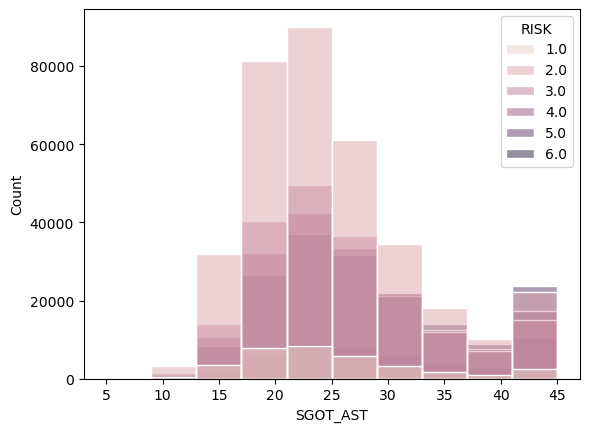

In [43]:
# X(수치형)-Y(범주형)
sns.histplot(x='SGOT_AST', data=df, hue='RISK', bins=10, edgecolor='WHITE')

SGOT_AST (혈청지오티_AST) 수치가 높아질수록 높은 RISK점수 범위인(3~6)의 비율이 증가함을 확인할 수 있다.

<AxesSubplot:xlabel='SGPT_ALT', ylabel='Count'>

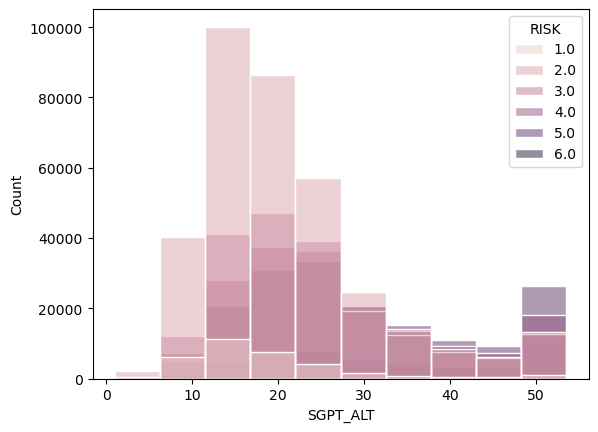

In [44]:
# X(수치형)-Y(범주형)
sns.histplot(x='SGPT_ALT', data=df, hue='RISK', bins=10, edgecolor='WHITE')

SGPT_ALT(혈청지오티_ALT) 수치가 높아질수록 높은 RISK점수 범위인(3~6)의 비율이 증가함을 확인할 수 있다.

<AxesSubplot:xlabel='GAMMA_GTP', ylabel='Count'>

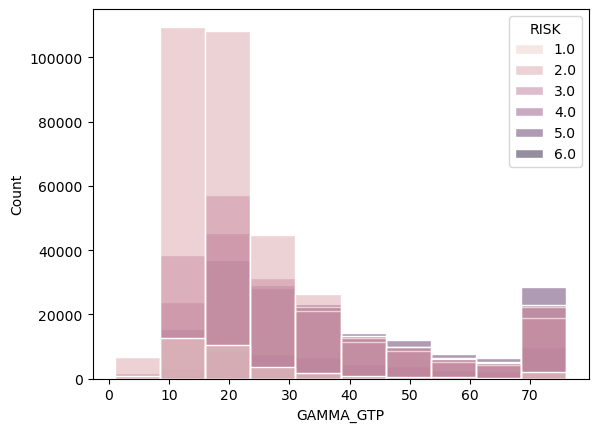

In [45]:
# X(수치형)-Y(범주형)
sns.histplot(x='GAMMA_GTP', data=df, hue='RISK', bins=10, edgecolor='WHITE')

GAMMA_GTP(감마지티피) 수치가 높아질수록 높은 RISK점수 범위인(3~6)의 비율이 증가함을 확인할 수 있다.

카이제곱 검정

In [46]:
# 범주형 데이터 컬럼
col=['DRK_YN']

# 카이제곱검정
from scipy.stats import chi2_contingency

for i in range(0,1):
    cross = pd.crosstab(df[col[i]], df['RISK'])
    chi2, pval, dof, exp = chi2_contingency(cross)

    print(col[i])
    print('카이제곱 통계량 :', round(chi2,4))
    p_value = '{:.4f}'.format(pval)
    print("p_value 값: ",p_value)

DRK_YN
카이제곱 통계량 : 3611.2006
p_value 값:  0.0000


* DRK_YN의 p_value값이 0.05보다 낮아 유의미함.

ANOVA 검정

In [47]:
import scipy.stats as stats
# 수치형 데이터 컬럼
col=[['SGOT_AST','SGPT_ALT','GAMMA_GTP']]

# 각 그룹의 col 데이터
for i in range(0,len(col)):
    group1 = df[df['RISK']==1][col[i]]
    group2 = df[df['RISK']==2][col[i]]
    group3 = df[df['RISK']==3][col[i]]
    group4 = df[df['RISK']==4][col[i]]
    group5 = df[df['RISK']==5][col[i]]
    group6 = df[df['RISK']==6][col[i]]
    
    # ANOVA 검정
    f_value, p_value = stats.f_oneway(group1,group2,group3,group4,group5,group6)
    
    # 결과 출력
    print(col[i])
    print("F_value:")
    print(f_value)
    print("P_value:")
    print(p_value)

['SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP']
F_value:
[ 6584.6381774  23949.45600844 16443.66704453]
P_value:
[0. 0. 0.]


* SGOT_AST,SGPT_ALT,GAMMA_GTP 컬럼이 RISK와 유의미함.
* SGPT_ALT,GAMMA_GTP,SGOT_AST 순으로 F_value 통계량이 높음.

로지스틱, 랜덤포레스트, 의사결정나무

In [48]:
# 독립/종속 변수(모든 변수 포함)
X=df.iloc[:,1:26]
Y=df.iloc[:,-1]

# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# 로지스틱 회귀, 랜덤포레스트, 의사결정나무
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

LR=LogisticRegression()
LR.fit(x_train, y_train)
y_test_predict=LR.predict(x_test)

RF=RandomForestClassifier()
RF.fit(x_train, y_train)
y_test_predict2=RF.predict(x_test)

DT=DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_test_predict3=DT.predict(x_test)

# 평가
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_test_predict)
accuracy2=accuracy_score(y_test, y_test_predict2)
accuracy3=accuracy_score(y_test, y_test_predict3)

print('LR_정확도 :', accuracy)
print('RF_정확도 :', accuracy2)
print('DT_정확도 :', accuracy3)

LR_정확도 : 0.8840597821497931
RF_정확도 : 1.0
DT_정확도 : 1.0


In [49]:
# 독립/종속 변수(파생변수 생성시 사용한 컬럼 제외)
X2=X.drop(['WEIGHT','HEIGHT','WAIST','BMI','FATNESS','OBESITY'],axis=1)
Y=df.iloc[:,-1]

# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X2, Y, test_size=0.3)

# 로지스틱 회귀, 랜덤포레스트, 의사결정나무
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

LR=LogisticRegression()
LR.fit(x_train, y_train)
y_test_predict=LR.predict(x_test)

RF=RandomForestClassifier()
RF.fit(x_train, y_train)
y_test_predict2=RF.predict(x_test)

DT=DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_test_predict3=DT.predict(x_test)

# 평가
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_test_predict)
accuracy2=accuracy_score(y_test, y_test_predict2)
accuracy3=accuracy_score(y_test, y_test_predict3)

print('LR_정확도 :', accuracy)
print('RF_정확도 :', accuracy2)
print('DT_정확도 :', accuracy3)

LR_정확도 : 0.38470320020265136
RF_정확도 : 0.39319766950941487
DT_정확도 : 0.28361732669087225


In [50]:
# 독립/종속 변수(파생변수 생성시 사용한 컬럼 제외, 음주관련 컬럼 제외)
X3=X.drop(['WEIGHT','HEIGHT','WAIST','BMI','FATNESS','OBESITY','DRK_YN','SGOT_AST','SGPT_ALT','GAMMA_GTP'],axis=1)
Y=df.iloc[:,-1]

# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X3, Y, test_size=0.3)

# 로지스틱 회귀, 랜덤포레스트, 의사결정나무
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

LR=LogisticRegression()
LR.fit(x_train, y_train)
y_test_predict=LR.predict(x_test)

RF=RandomForestClassifier()
RF.fit(x_train, y_train)
y_test_predict2=RF.predict(x_test)

DT=DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_test_predict3=DT.predict(x_test)

# 평가
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_test_predict)
accuracy2=accuracy_score(y_test, y_test_predict2)
accuracy3=accuracy_score(y_test, y_test_predict3)

print('LR_정확도 :', accuracy)
print('RF_정확도 :', accuracy2)
print('DT_정확도 :', accuracy3)

LR_정확도 : 0.3630769230769231
RF_정확도 : 0.368244532635312
DT_정확도 : 0.2673410453432407


### 10. 결론 Conclusion
- EDA 과정에서 발견한 결과와 인사이트를 요약합니다.

* 음주는 비만 동반 질병 위험도에 영향을 줄까?

* SGOT_AST : 위험도가 높아질 수록 SGOT_AST 수치가 증가한다.
* SGPT_ALT : 위험도가 높아질 수록 SGPT_ALT 수치가 증가한다.
* GAMMA_GTP : 위험도가 높아질 수록 GAMMA_GTP 수치가 증가한다.
* DRK_YN : 위험도가 높아질 수록 음주하는 사람의 수가 증가한다.


* DRK_YN,SGOT_AST,SGPT_ALT,GAMMA_GTP 음주 관련 4개의 컬럼은 RISK(위험도)와 유의미함을 확인.
* 회귀분석 결과, 음주 관련 4개의 컬럼을 제외한 모델보다 포함한 모델의 정확도가 미세하지만 더 높음을 확인.
* 3가지 조건에서 3가지 모델을 적용한 결과 RandomForest 모델의 성능이 가장 좋음. 